# Proposal

### Aim: 

Indicating how COVID-19 spread worldwidely, which continent/country is the most severe and in addition, to analyze how COVID-19 spreads in US, CA and China. Finally, conduct a time series analysis on the COVID-19 cases in certain countries (US, CA and China) based on the confirmed cases.

### Objectives:

### Primary Objectives:

- To figure out the country with the most confirmed and recovered cases worldwidely.

- To figure out the Province/State with the most confirmed number in US.

- To find if there are any factors that relate to the incidence rate of COVID-19, retrieve results from different countries.

- To determine the trend of COVID-19 in the future.

### Secondary Objectives:

- To compare the recovery rate and active cases remain of the top 3 countries with most confirmed cases.

- To provide basis for future study

### Steps involved our analysis:

Step 1. Data loading and cleaning

Step 2. Comparison between countries worldwidely

- Use color-code to highlight countries with large amount of confirmed cases worldwidely

- Highlight states in US with scale to indicate how COVID spreads.

Step 3. Prediction of COVID

- Use bar graphs to show COVID confirmed cases up to Aug 24, 2021 in Canada and China.

- Predict the future trends based on our model.

In [50]:
!pip install pmdarima

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

     |████████████████████████████████| 592 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 17.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [5]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-01-2021.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-01-2021.csv')
confirmed_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [137]:
confirmed_us.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
0  32.539527 -86.644082  ...    8332     8332     8486     8550     8637   
1  30.727750 -87.722071  ...   31313    31313    31878    32054    32511   
2  31.868263 -85.387129  ...    2878     2878     2929     2948     2988   
3  32.996421 -87.125115  ...    3306     3306     3359     3385     3415   
4  33.982109 -86.567906  ...    8173     8173     8340     8413     8482   

   8/29/21  8/30/21  8/31/21  9/1/21  9/2/21  
0     8657     8719     8758    8798    8873  
1    32671    32783    33090   33270   33480  
2     3020     3036     3060    3086    3100  
3     3426     3436     3479    3510    3545  
4     8512     8530     8595    8631    8699  

[5 rows x 601 columns]

In [117]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/24/21  8/25/21  8/26/21  \
0        0        0        0        0  ...   152660   152722   152822   
1        0        0        0        0  ...   140521   141365   142253   
2        0        0        0        0  ...   192626   193171   193674   
3        0        0        0        0  ...    15003    15014    15016   
4        0        0        0        0  ...    46340    46539    46726   

   8/27/21  8/28/21  8/29/21  8/30/21  8/31/21  9/1/21  9/2/21  
0   152960   152960   152960   153148   153220  153260  153306  
1   143174   144079   144847   145333   146387  147369  148222  
2   194186   194671   195162   195574   196080  196527  196915  
3    15025    15025    15025    15032    15033   15046   15052  
4    46929    47079    47168    47331    47544   47781   48004  

[5 rows x 594 columns]

In [97]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/24/21  8/25/21  8/26/21  \
0        0        0        0        0  ...     7083     7090     7093   
1        0        0        0        0  ...     2480     2483     2486   
2        0        0        0        0  ...     5063     5096     5121   
3        0        0        0        0  ...      130      130      130   
4        0        0        0        0  ...     1166     1176     1182   

   8/27/21  8/28/21  8/29/21  8/30/21  8/31/21  9/1/21  9/2/21  
0     7101     7101     7101     7116     7118    7123    7127  
1     2487     2490     2492     2495     2498    2501    2505  
2     5148     5179     5209     5240     5269    5302    5339  
3      130      130      130      130      130     130     130  
4     1186     1192     1201     1210     1217    1227    1235  

[5 rows x 594 columns]

In [98]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/24/21  8/25/21  8/26/21  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...        0        0        0   
2        0        0        0        0  ...        0        0        0   
3        0        0        0        0  ...        0        0        0   
4        0        0        0        0  ...        0        0        0   

   8/27/21  8/28/21  8/29/21  8/30/21  8/31/21  9/1/21  9/2/21  
0        0        0        0        0        0       0       0  
1        0        0        0        0        0       0       0  
2        0        0        0        0        0       0       0  
3        0        0        0        0        0       0       0  
4        0        0        0        0        0       0       0  

[5 rows x 594 columns]

In [99]:
latest_data.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-08-02 04:21:36  33.93911   
1   NaN    NaN            NaN        Albania  2021-08-02 04:21:36  41.15330   
2   NaN    NaN            NaN        Algeria  2021-08-02 04:21:36  28.03390   
3   NaN    NaN            NaN        Andorra  2021-08-02 04:21:36  42.50630   
4   NaN    NaN            NaN         Angola  2021-08-02 04:21:36 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953     146523    6677    82586.0  57260.0  Afghanistan   
1  20.168300     133121    2457   130243.0    421.0      Albania   
2   1.659600     172564    4291   116009.0  52264.0      Algeria   
3   1.521800      14678     128    14210.0    340.0      Andorra   
4  17.873900      42815    1016    37397.0   4402.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     376.391586             4.556964  
1    4625.790534             1.845689  
2     393.523137             2.486614  
3   18996.958519             0.872053  
4     130.270343             2.373000

In [100]:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2021-08-02 04:30:45  32.3182  -86.9023   
1          Alaska             US  2021-08-02 04:30:45  61.3707 -152.4044   
2  American Samoa             US  2021-08-02 04:30:45 -14.2710 -170.1320   
3         Arizona             US  2021-08-02 04:30:45  33.7298 -111.4312   
4        Arkansas             US  2021-08-02 04:30:45  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  \
0     587405   11536        NaN     NaN   1.0   11980.070097   
1      75486     389        NaN     NaN   2.0   10318.709034   
2          0       0        NaN     NaN  60.0       0.000000   
3     929541   18251        NaN     NaN   4.0   12770.670985   
4     388436    6157        NaN     NaN   5.0   12871.478731   

   Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio         UID  \
0           2756534.0                  NaN             1.963892  84000001.0   
1           2496001.0                  NaN             0.515327  84000002.0   
2              2140.0                  NaN                  NaN        16.0   
3          10737481.0                  NaN             1.963442  84000004.0   
4           3318720.0                  NaN             1.585075  84000005.0   

  ISO3   Testing_Rate  Hospitalization_Rate  
0  USA   56219.253404                   NaN  
1  USA  341195.825274                   NaN  
2  ASM    3846.084722                   NaN  
3  USA  147518.869053                   NaN  
4  USA  109971.356655                   NaN

In [101]:
confirmed_us.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
0  32.539527 -86.644082  ...    8332     8332     8486     8550     8637   
1  30.727750 -87.722071  ...   31313    31313    31878    32054    32511   
2  31.868263 -85.387129  ...    2878     2878     2929     2948     2988   
3  32.996421 -87.125115  ...    3306     3306     3359     3385     3415   
4  33.982109 -86.567906  ...    8173     8173     8340     8413     8482   

   8/29/21  8/30/21  8/31/21  9/1/21  9/2/21  
0     8657     8719     8758    8798    8873  
1    32671    32783    33090   33270   33480  
2     3020     3036     3060    3086    3100  
3     3426     3436     3479    3510    3545  
4     8512     8530     8595    8631    8699  

[5 rows x 601 columns]

### COVID-19 spread - worldwidely and in US

In [102]:
import plotly.express as px

fig = px.choropleth(confirmed_df, locations = 'Country/Region', locationmode = 'country names', color = '8/24/21')
fig.update_layout(title_text = 'COVID-19 Global Confirmed Cases')
fig.show()

From the above graph of daily confirmed cases worldwidely, we can see that US is the country with most confirmed cases as of Aug 24, 2021. As the amount of confirmed COVID-19 cases are shown as the scale on the right, we can also say that  COVID-19 is spreading severrly in both Brazil and India. In the next part, we will mainly focus in US, how it got the most confirmed cases, in Canada, as it is where I currently live, in China, how it controls COVID from spreading.

In [103]:
us_medical_data['abbrev'] = us_medical_data.Province_State.replace(us_state_abbrev)

In [104]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def US_COVID(topic):
    data = dict(type = 'choropleth',
            locations = us_medical_data['abbrev'],
            locationmode = 'USA-states',
            colorscale = 'Reds',
            text = 'COVID',
            z = us_medical_data[topic],
            colorbar = {'title': topic + ' number'})
    layout = dict(title = 'USA COVID' + topic, geo = dict(scope='usa'))
    choromap = go.Figure(data = [data], layout = layout)
    iplot(choromap)
    


In [105]:
US_COVID('Confirmed')

As the darker the red is, the severer the issue might be in that state, we can conclue that California is the state with most confirmed COVID-19 cases currently in US. As California has the most population in US, we need to combine it with Texas, which is the state with the 2nd most population and Florida, which is the 3rd, to get results. From the country map, we can see that these three states follow the proporty that the more people they got, the higher the confirmed number. As we also want to figure out if development level might affect COVID incident rate, we will take a look at the map of fatality rate in US.

In [106]:
US_COVID('Case_Fatality_Ratio')

From the fatality rate map, we can conclude that states with the highest fatality ratio are around New Jersey, Miami and New York. As all these three states stack together, we might conclue that here is the most severe COVID spreading area in US. Also, as New York is one of the most developed states in US and it still has a relatively high fatality ratio, we can say that we still haven't found an efficient cure to COVID but prevent it from happening. 

### COVID-19 trends in Canada and China

#### In Canada

In [107]:
def bar_analysis(country):
    confirmed = confirmed_df[confirmed_df['Country/Region'] == country]
    confirmed.reset_index()
    dates = confirmed.columns[4:]
    province = confirmed['Province/State']
    fig = go.Figure(data=[go.Bar(name = province[list(confirmed.index)[i]], x=dates, y=list(confirmed.iloc[i,4:])) for i in range(len(confirmed))])
    fig.update_layout(barmode='stack',title_text='Time Series Confirmed Cases across ' + country)
    iplot(fig)

#### In US

In [108]:
us_stats = confirmed_us.groupby('Province_State').sum()
dates = us_stats.columns[5:]
province = us_stats.index
fig = go.Figure(data=[go.Bar(name = province[i], x=dates, y=list(us_stats.iloc[i,5:])) for i in range(len(us_stats))])
fig.update_layout(barmode='stack',title_text='Time Series Confirmed Cases across US')
iplot(fig)

From bar graph above, we are able to see that the state with most confirmed cases since Jan 22, 2020 is California of around 4.4M. Also, we are able to see an obvious increasing trend in some states like California and Florida which means there may keep getting increasing COVID cases if there is no external factors to interevene.

In [109]:
bar_analysis('Canada')

From the bar graph, we can conclude that Ontario is currently the province with most confirmed COVID cases and the other two top provinces are Quebec and ALberta. Although confirmed cases not increase rapidly in Canada, it also never stop as we see that confirmed cases keep increasing day after day. From the trends of data from these provinces, we may predict that confirmed cases may keep increasing in the future as we can't see any declining trend from the graph. To consolidate our opinion, we will make a futrue prediction based on the SVM and linear regression model in the next part.

#### In China

In [110]:
bar_analysis('China')

We can see there was a burst increasing in the amount of confirmed cases from Feb 13, 2020. Hubei was the province with the most severe situation as it had a confirmed amount of around 64k by Feb 23, 2020. Luckily, the confirmed cases in almost all provinces remain at a steady state, which means confirmed cases don't increase rapidly, except for Hong Kong, as we still can see increasing confirmed cases from Juy 27, 2020. From the trends of provinces in China, we may assume that COVID has been under controll in China, but we still make reliable future prediction based on SVM and linear regression model in the next part.

In [111]:
from IPython.display import IFrame

IFrame(src='./confirmed.html', width=700, height=600)

From the country map of China, we are able to get the idea of confirmed COVID cases as of Aug 24, 2021 intuitively. The result from the map consistent with our conclusion from bar graph of China that Hubei got the most confirmed cases which was around 60k. Actually we plotted confirmed cases of every province in China, but we can rarely show them on the map as those values are too small when comparing to 60k.

In [112]:
from IPython.display import IFrame

IFrame(src='./Density.html', width=700, height=600)

Then We take a look at the density graph of confirmed COVID cases in China as of Aug 24, 2021. The scale of this map is 1:1 million to avoid datasets to be huge. Also, I removed data of Hubei and Hongkong as their value are much greater than other provinces and may affect the outcome of our graph. From graph exclude Hubei and Hongkong, we can see that the province/city with the highest density of confirmed cases was Shanghai with around 101 in 1 million.

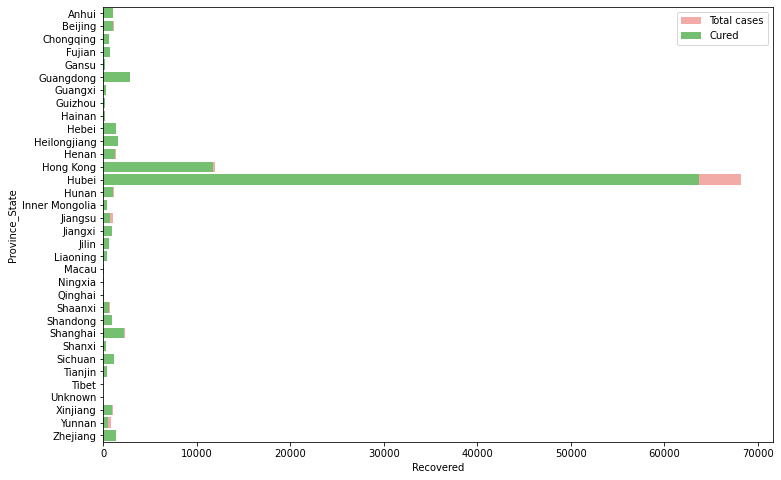

In [113]:
import matplotlib.pyplot as plt
compare_China = latest_data[latest_data['Country_Region'] == 'China']
f, ax = plt.subplots(figsize = (12, 8))
compare = compare_China[['Province_State', 'Confirmed', 'Recovered', 'Deaths']]
sns.set_color_codes('pastel')
sns.barplot(x = 'Confirmed', y = 'Province_State', data = compare, label = 'Total cases', color = 'r')
sns.set_color_codes('muted')
sns.barplot(x = 'Recovered', y = 'Province_State', data = compare, label = 'Cured', color = 'g')

ax.legend()

The bar graph indicates the ratio of total confirmed cases and cured cases in China as of Aug 24, 2021. The green part indicates the cure portion whereas the red part shows the total confirmed cases. We can say that almost every confirmed COVID cases in China from every province was cureved, except for Hubei, that there still was a small portion of confirmed cases that was not cured. We are glad to see graph like this as this shows China has almost successfully controlled the spreading of COVID issue and fully contribute to the cure of it.

### Prediction of COVID-19 trends

In [111]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

def model_fit(country_name, method, days):
    country = confirmed_df[confirmed_df['Country/Region'] == country_name]
    cols = country.keys()
    confirmed = country.loc[:, cols[-days - 4]:cols[-4]]
    dates = confirmed.keys()
    world_cases = []
    for i in dates:
        confirmed_sum = confirmed[i].sum()
        world_cases.append(confirmed_sum)
    day_since = np.array([i for i in range(len(dates))]).reshape(-1, 1)
    world_cases = np.array(world_cases).reshape(-1, 1)
    future_forecast = np.array([i for i in range(len(dates) + 10)]).reshape(-1, 1)
    adjusted_dates = future_forecast[: -10]
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(day_since, world_cases, test_size = 0.15, shuffle = False)
    
    if method == 'svm':
        kernel = ['poly', 'sigmoid', 'rbf']
        c = [0.01, 0.1, 1, 10]
        gamma = [0.01, 0.1, 1]
        epsilon = [0.01, 0.1, 1]
        shrinking = [True, False]
        svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

        svm = SVR()
        svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = days + 10, verbose = 1)
        svm_search.fit(X_train_confirmed, y_train_confirmed)
    
        svm_confirmed = svm_search.best_estimator_
        svm_pred = svm_confirmed.predict(future_forecast)
        
    
        svm_test_pred = svm_confirmed.predict(X_test_confirmed)

        
        print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
        print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))
        print('Future forecase: ', svm_pred[-1])
        plt.figure(figsize = (20, 12))
        plt.plot(adjusted_dates, world_cases)
        plt.plot(future_forecast, svm_pred, linestyle = 'dashed', color = 'red')
    
    if method == 'linear':
        linear_model = LinearRegression(normalize = True, fit_intercept = True)
        linear_model.fit(X_train_confirmed, y_train_confirmed)
        test_linear_pred = linear_model.predict(X_test_confirmed)
        linear_pred = linear_model.predict(future_forecast)
        
        print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
        print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))
        print('Future forecase: ', linear_pred[-1])
        plt.figure(figsize = (20, 12))
        plt.plot(adjusted_dates, world_cases)
        plt.plot(future_forecast, linear_pred, linestyle = 'dashed', color = 'red')
    
    
    plt.title('Confirmed cases Over time in ' + country_name, size = 30)
    plt.xlabel( str(days) + ' Days Before 08/24/2021', size = 30)
    plt.ylabel('Number of Confirmed Cases', size = 30)
    plt.legend(['Confirmed Cases', method + ' predictions'])
    plt.show()



In [112]:
def us_fit(method, days):
    country = confirmed_us[confirmed_us['Country_Region'] == 'US']
    cols = country.keys()
    confirmed = country.loc[:, cols[-days - 4]:cols[-4]]
    dates = confirmed.keys()
    world_cases = []
    for i in dates:
        confirmed_sum = confirmed[i].sum()
        world_cases.append(confirmed_sum)
    day_since = np.array([i for i in range(len(dates))]).reshape(-1, 1)
    world_cases = np.array(world_cases).reshape(-1, 1)
    future_forecast = np.array([i for i in range(len(dates) + 10)]).reshape(-1, 1)
    adjusted_dates = future_forecast[: -10]
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(day_since, world_cases, test_size = 0.15, shuffle = False)
    
    if method == 'svm':
        kernel = ['poly', 'sigmoid', 'rbf']
        c = [0.01, 0.1, 1, 10]
        gamma = [0.01, 0.1, 1]
        epsilon = [0.01, 0.1, 1]
        shrinking = [True, False]
        svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

        svm = SVR()
        svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = days + 10, verbose = 1)
        svm_search.fit(X_train_confirmed, y_train_confirmed)
    
        svm_confirmed = svm_search.best_estimator_
        svm_pred = svm_confirmed.predict(future_forecast)
        
    
        svm_test_pred = svm_confirmed.predict(X_test_confirmed)

        
        print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
        print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))
        print('Future forecase: ', svm_pred[-1])
        plt.figure(figsize = (20, 12))
        plt.plot(adjusted_dates, world_cases)
        plt.plot(future_forecast, svm_pred, linestyle = 'dashed', color = 'red')
    
    if method == 'linear':
        linear_model = LinearRegression(normalize = True, fit_intercept = True)
        linear_model.fit(X_train_confirmed, y_train_confirmed)
        test_linear_pred = linear_model.predict(X_test_confirmed)
        linear_pred = linear_model.predict(future_forecast)
        
        print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
        print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))
        print('Future forecase: ', linear_pred[-1])
        plt.figure(figsize = (20, 12))
        plt.plot(adjusted_dates, world_cases)
        plt.plot(future_forecast, linear_pred, linestyle = 'dashed', color = 'red')
    
    
    plt.title('Confirmed cases Over time in US', size = 30)
    plt.xlabel( str(days) + ' Days Before 08/24/2021', size = 30)
    plt.ylabel('Number of Confirmed Cases', size = 30)
    plt.legend(['Confirmed Cases', method + ' predictions'])
    plt.show()

### Prediction based on 30 days

Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 1005527.2041384801
MSE: 1168372689442.9321
Future forecase:  47184911.28903533


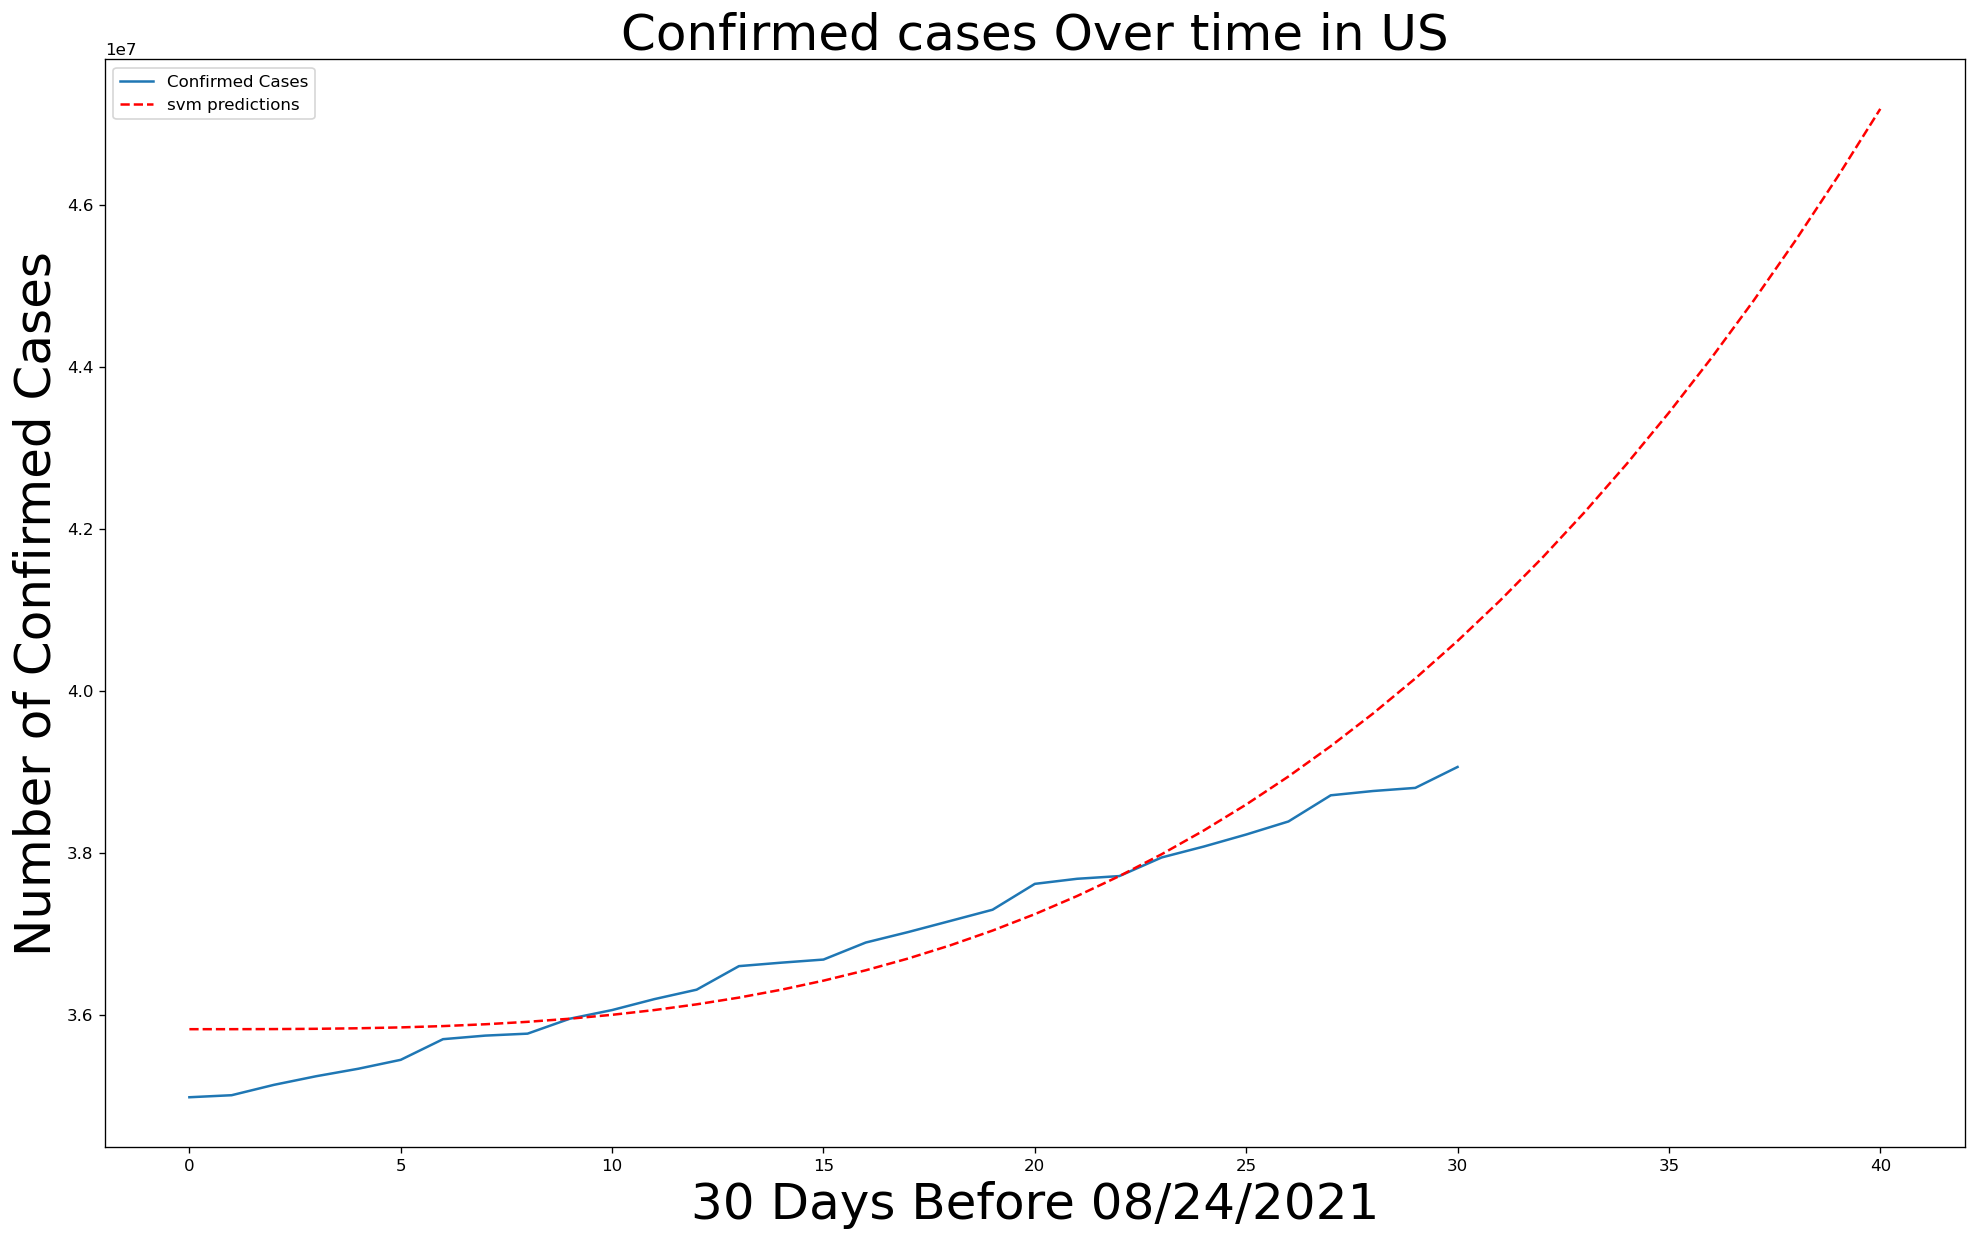

In [113]:
us_fit('svm', 30)

Firstly, we use the SVM model to make our prediction of the US 10 days after Aug 24, 2021. Intuitively, we can see that the SVM model might not be appropriate for the US as it tends to go up rapidly ignore the US's current trend. From the prediction of the SVM model, it shows there will be confirmed cases of 47,184,899 which is an increase of around 10M cases in 10 days. This result is not reliable as the US got an increased amount of 3M for the past 20 days. Therefore, we will take a look at the linear regression model of the US.

MAE: 205100.59145299197
MSE: 47391068790.88932
Future forecase:  [40133188.36752137]


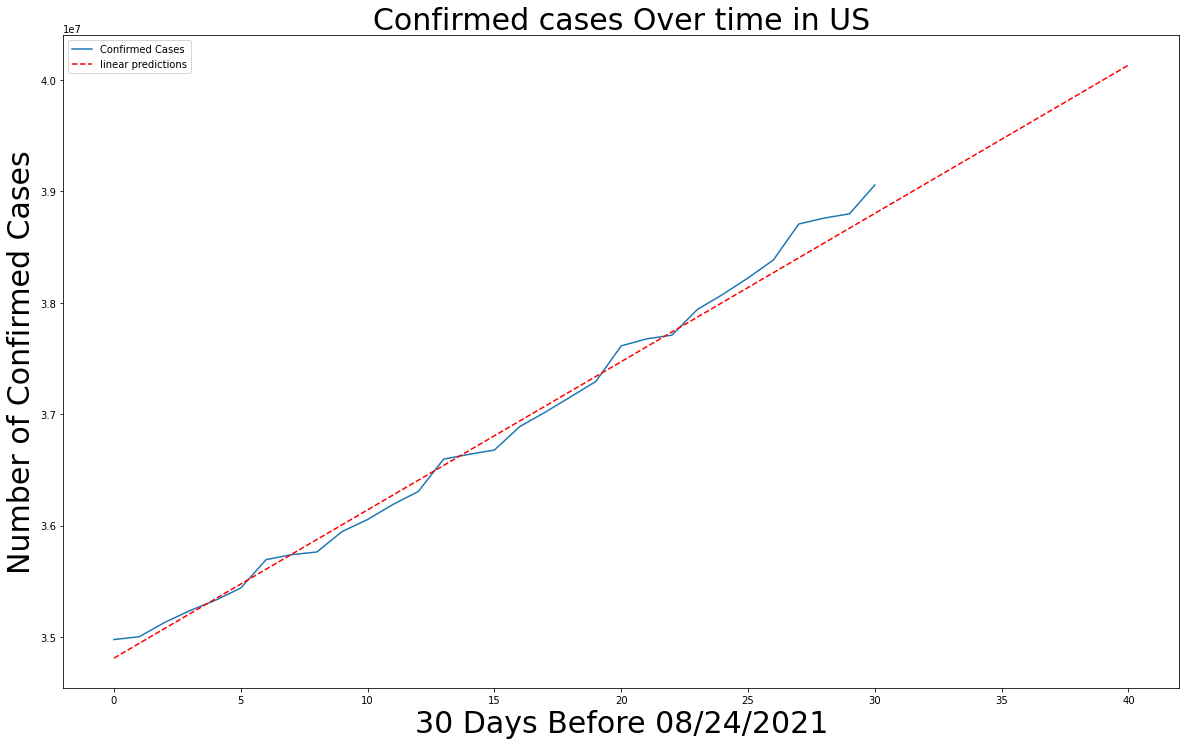

In [145]:
us_fit('linear', 30)

The linear regression model seems much more reasonable to me as most data lies on the linear regression line. The future prediction shows there will be an increased amount of 1M in confirmed cases. Compare to its past data with an increased amount of 3M over 20 days, the linear regression model is more valid.

Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 635.0250442718127
MSE: 440554.30126823625
Future forecase:  110683.36422269343


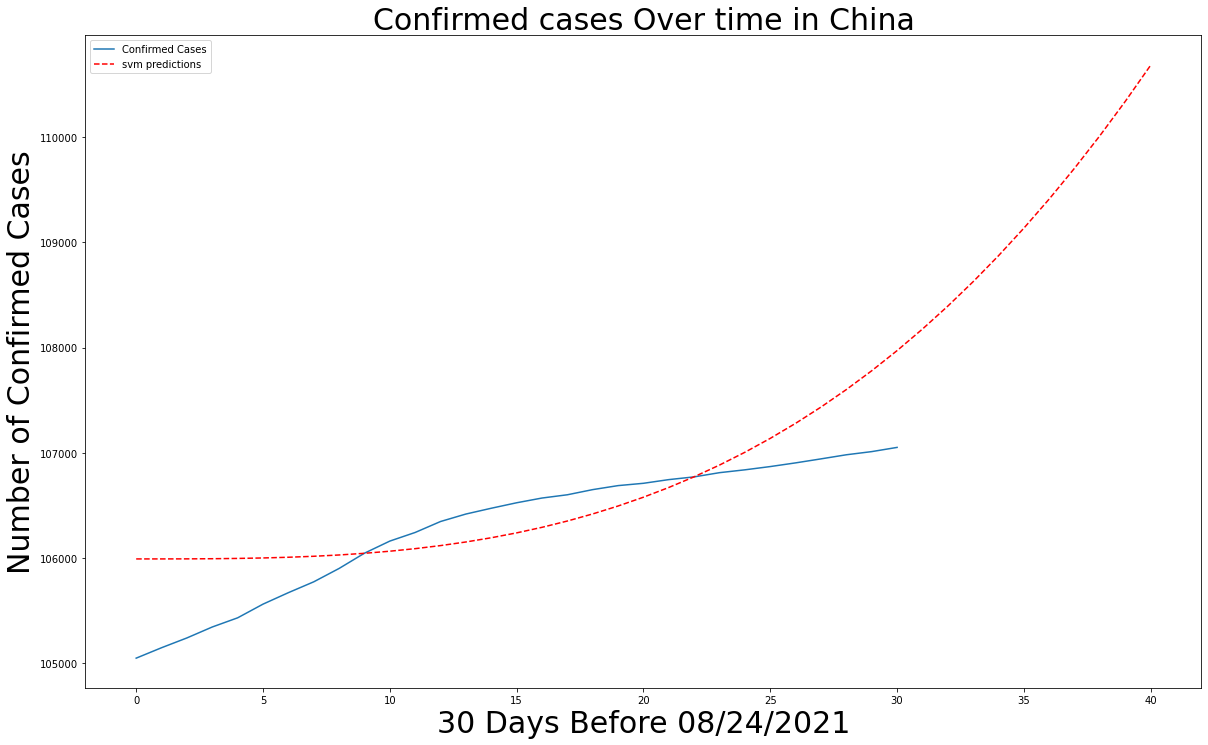

In [128]:
model_fit('China', 'svm', 30)

We are going to take a look at the prediciton of confirmed COVID cases 10 days after Aug 24, 2021 in China. First we use SVM model. SVM is a predictive analysis data-classification algorithm that assigns new data elements to one of labeled categories. From our model where red dashed line indicates the svm model, we can see prediction is not really accurate as trend of confirmed cases in China tends to decline whereas our predicted model tends to keep going up. One possible reason to cause this is our model doesn't involve external intervention like area lockdown, so we will take a look at linear regression prediction.

MAE: 361.2317948717944
MSE: 133488.4871731754
Future forecase:  [108240.05641026]


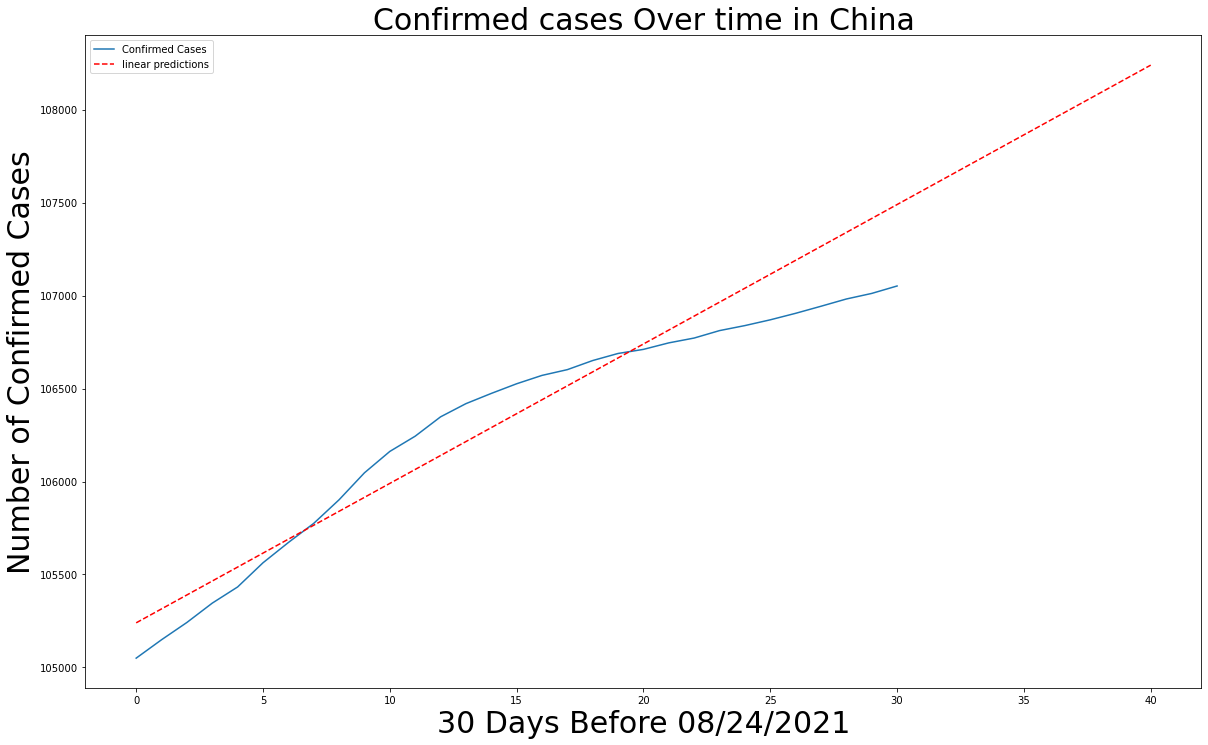

In [120]:
model_fit('China', 'linear', 30)

Linear regression is one of the most commonly used predictive modelling techniques based on dependent (target) and independent variable (predictor). We are able to see that the linear regression model fits more appropriate than our svm model. Our data of confirmed cases lies on the predicted regression line which provides a better accuracy then svm model. From our linear model, China may has around 2k confirmed cases increase 10 days after Aug 24, 2021.

Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 9241.474880951038
MSE: 105988079.37769733
Future forecase:  1614102.4336272653


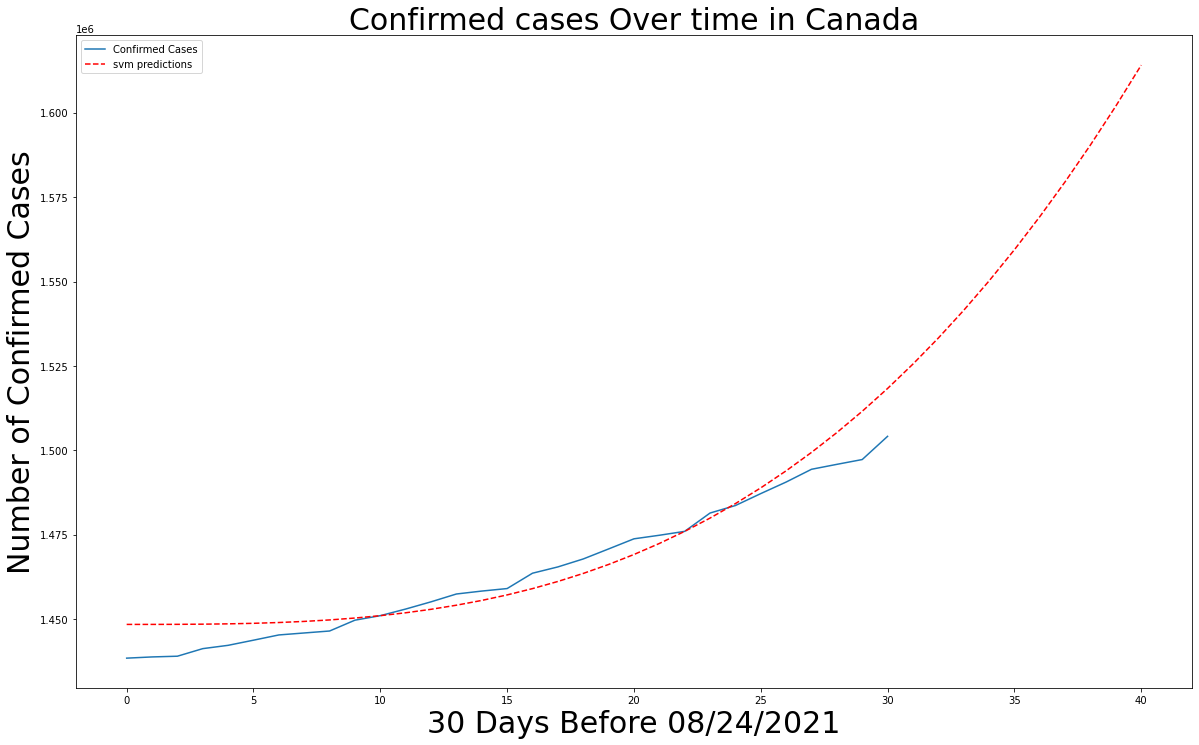

In [133]:
model_fit('Canada', 'svm', 30)

From svm model of Canada, we can see most data lies on the curve where svm model predicts a greater trend of increasing number in confirmed cases. It predicts that Canada may has an increase of 120k by 10 days after Aug 24, 2021. Although most data fits on the curve compare to data of China, the increasing amount still seems unreasonable as the confirmed cases only increased around 40k from July 25, 2021 to Aug 24, 2021. Therefore, we will try linear regression model on Canada.

MAE: 8168.512820512941
MSE: 70691820.4648541
Future forecase:  [1511694.33333333]


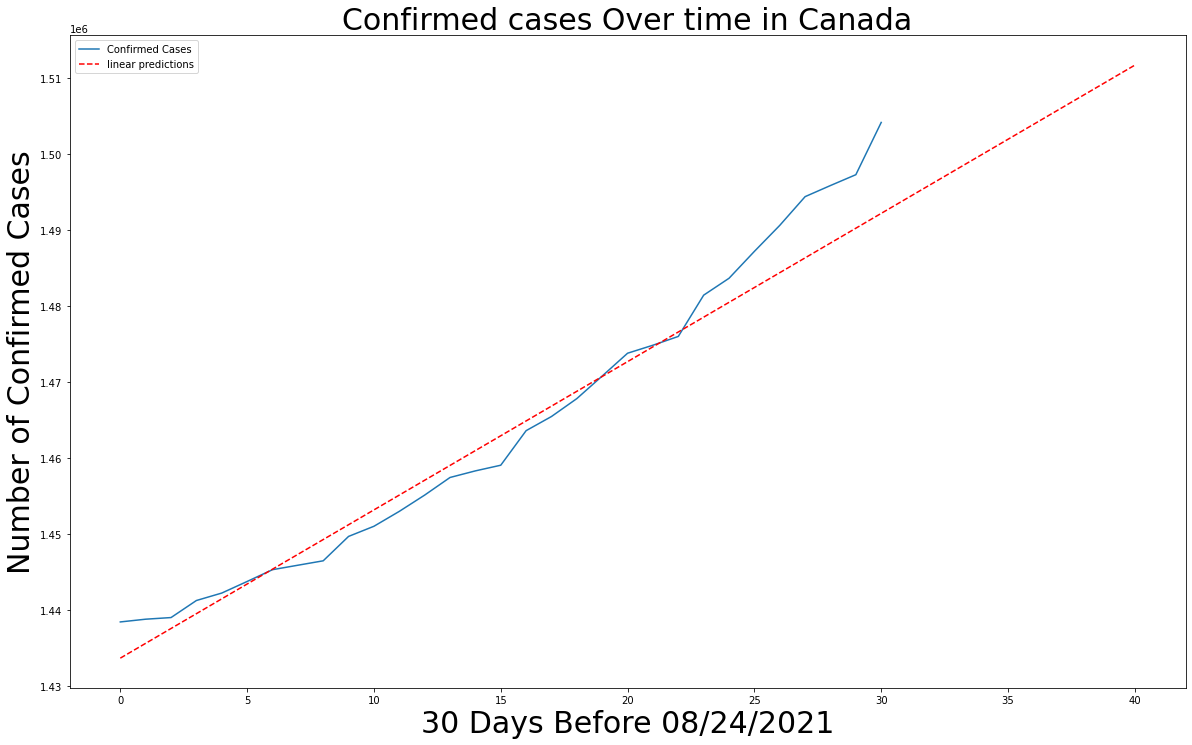

In [134]:
model_fit('Canada', 'linear', 30)

We can see that linear regression prediction model fits more appropriate compare to the svm model. It predicts that Canada may has an increasing amount of around 10k 10 days after Aug 24, 2021. From the value we retrieve from the graph, we can also say that this prediction model is more reliable as confirmed cases don't increase rapidly like the svm model. The only problem is we see that the trend of confirmed cases in Canada tends to go up at a faster rate where our linear regression model only predicts it linearly, so it can't introduce any outer interference which may predicts lower than the actual value.

### Prediction based on 50 days

Although we have plotted prediction over 30 days, we want to make sure that our data is accurate based on seperate models. Therefore, we want to check if the mean squared error which is the average of the squares of the errors get smaller when our input size gets bigger.

Fitting 3 folds for each of 60 candidates, totalling 180 fits
MAE: 1185174.403615362
MSE: 1584653636042.5938
Future forecase:  45707734.41977275


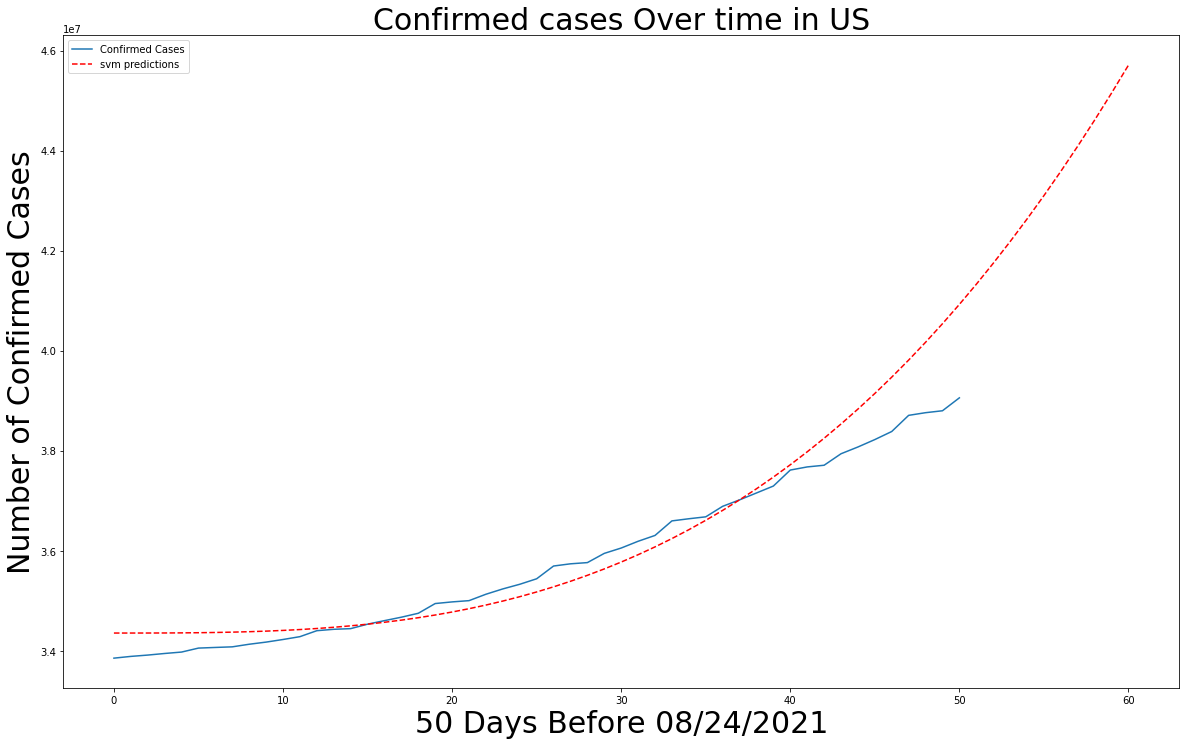

In [146]:
us_fit('svm', 50)

MAE: 747771.1218287582
MSE: 584932052655.4546
Future forecase:  [39020725.66490486]


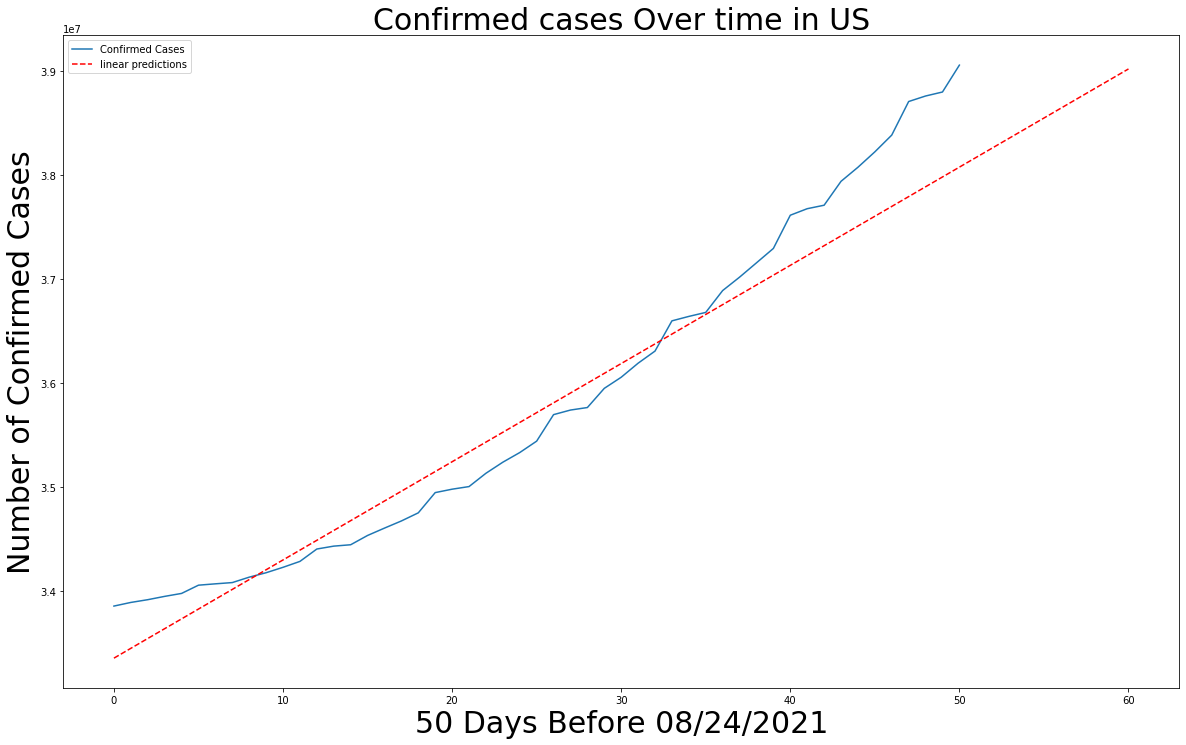

In [147]:
us_fit('linear', 50)

From our plot of US prediction over 50 days, we can see that both the SVM model and linear regression model have an increase in MSE which means both methods are not appropriate for data of US. One possible reason to cause this might be confirmed cases in the US is too large for our model that many errors may involve. So, we will take a look at China and Canada to see whether these two methods work for them.

Fitting 3 folds for each of 60 candidates, totalling 180 fits
MAE: 1988.9261105484893
MSE: 4269301.08710566
Future forecase:  113840.71685676892


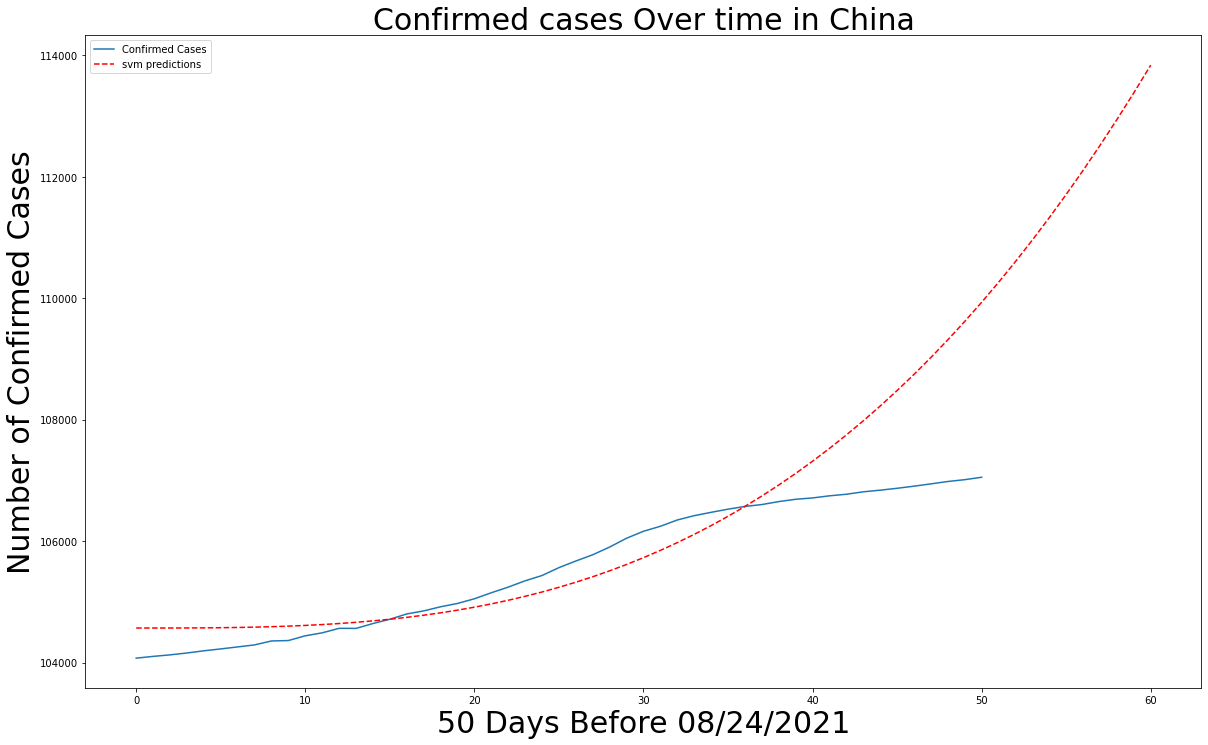

In [135]:
model_fit('China', 'svm', 50)

MAE: 297.7636288130434
MSE: 96892.87170202537
Future forecase:  [108227.79341589]


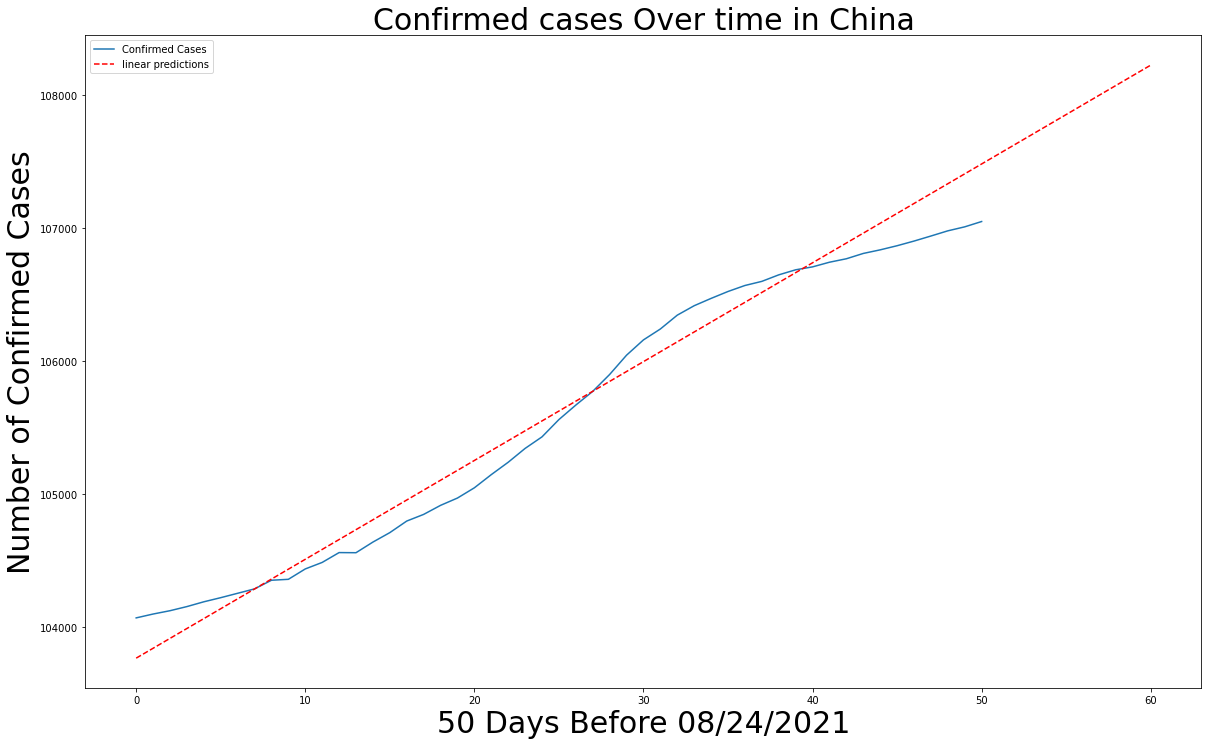

In [136]:
model_fit('China', 'linear', 50)

By comparing both SVM model and linear regression model, we got a value of MSE that is much greater for data over 50 days with svm model than data over 30 days. Its quite obvious that MSE value increases as we increase our data input which means SVM model is not appropriate for China. Then we check linear regression model, we also get MSE for 50 days is much smaller than MSE for 30 days. We are glad to see that MSE decreased a lot which means linear regression model is better than SVM model for China.

Fitting 3 folds for each of 60 candidates, totalling 180 fits
MAE: 3074.432598048181
MSE: 11674219.225127399


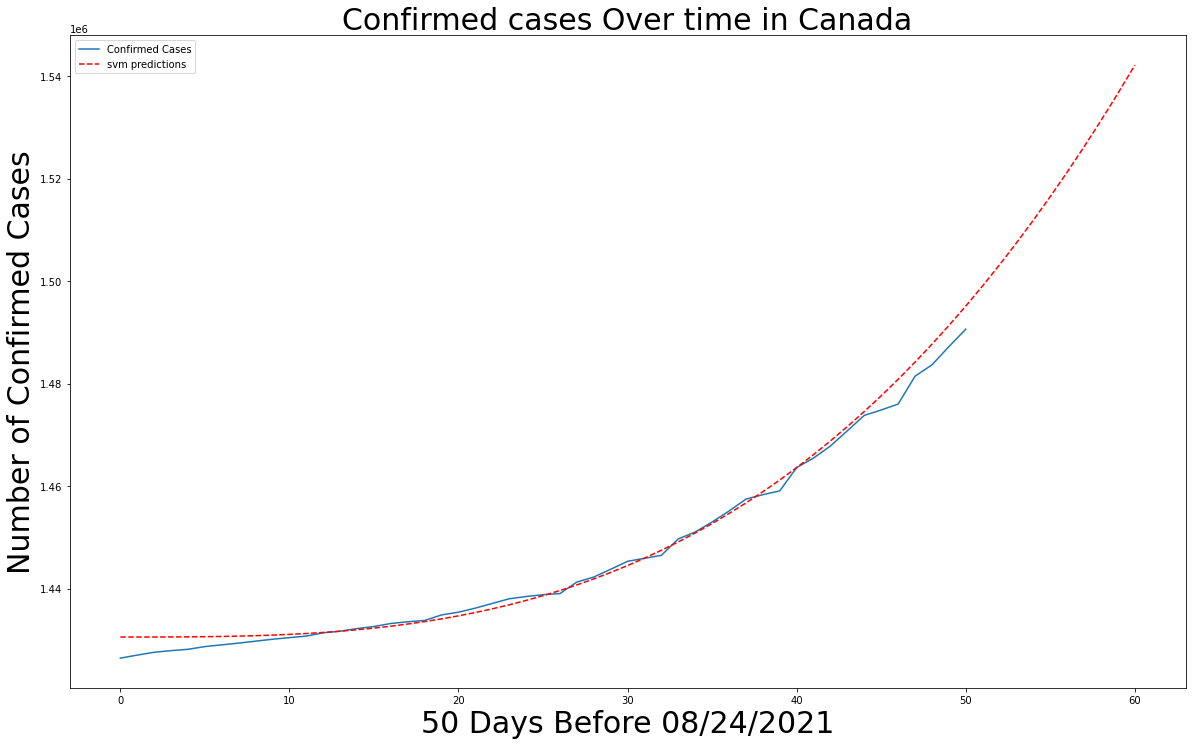

In [87]:
model_fit('Canada', 'svm', 50)

MAE: 17384.51389308367
MSE: 323263344.6991447


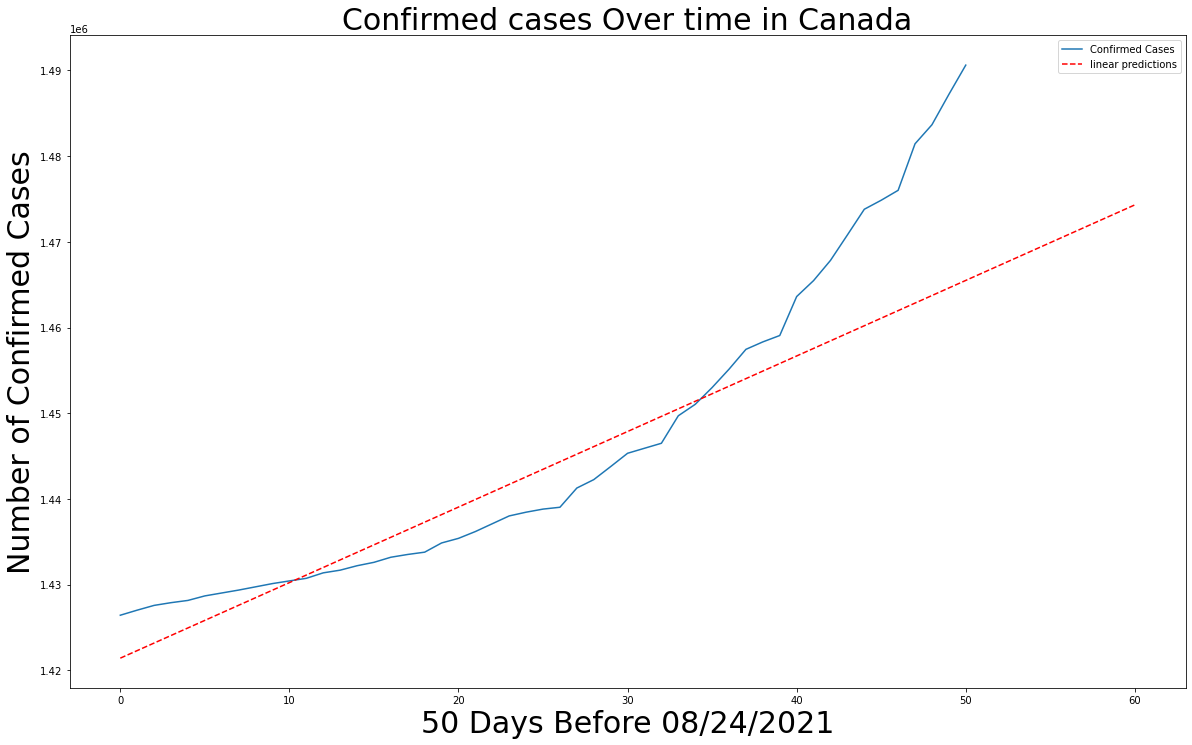

In [88]:
model_fit('Canada', 'linear', 50)

After China, we check our data on Canada. SVM model on Canada has a MSE value over 30 days that is greater than value over 50 days. This time we retrieve different test results from China that MSE value decreases as the size of input increase. To ensure SVM model is better for Canada, we check MSE of linear regression model of Canada. MSE has a value smaller value over 30 days than over 50 days which shows an increasing trend with increase of input size. Therefore, we can conclude that SVM model is much better for Canada than linear regression.

As we have proved linear regression is better for China and SVM model is better for Canada, we can see what prediction value do these two models have for two countries 10 days after Aug 24, 2021. for China, linear regression model predicts that it may has a total confirmed cases of 108274 and for Canada, SVM model predicts that it may has a total  of 1,605,595 by 10 days after. 

### Prediction use ARIMA Model

In [290]:
df = confirmed_df[confirmed_df['Country/Region'] == 'China'].sum()
df = df[-200:]
keys = df.keys().tolist()
value = []
for cha in keys:
    value.append(df[cha])
    
dic = {'Month': keys, 'value': value}
df = pd.DataFrame(dic)

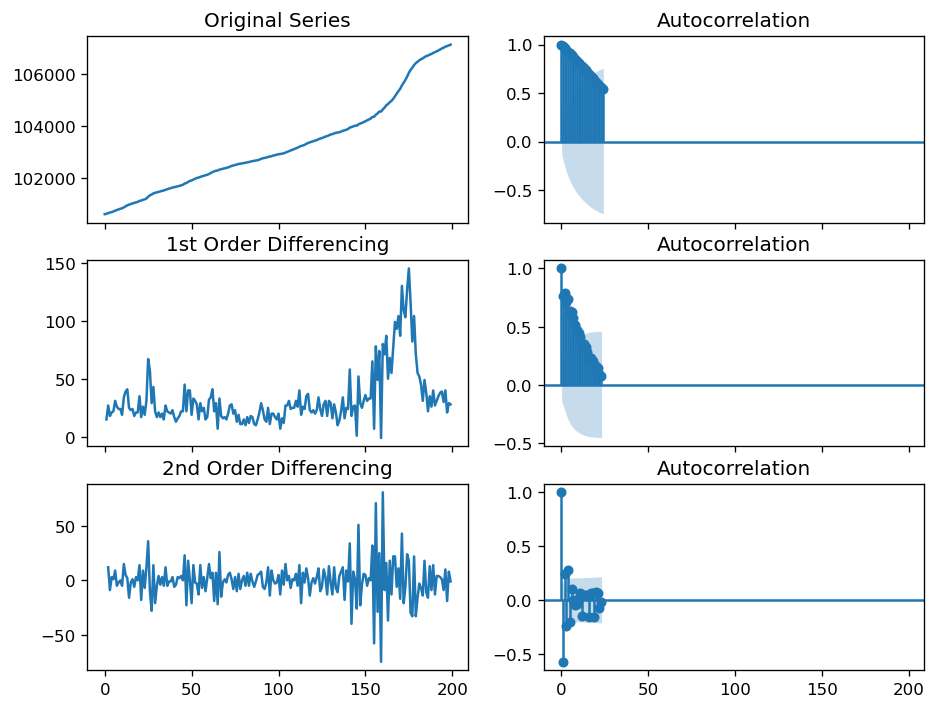

In [291]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

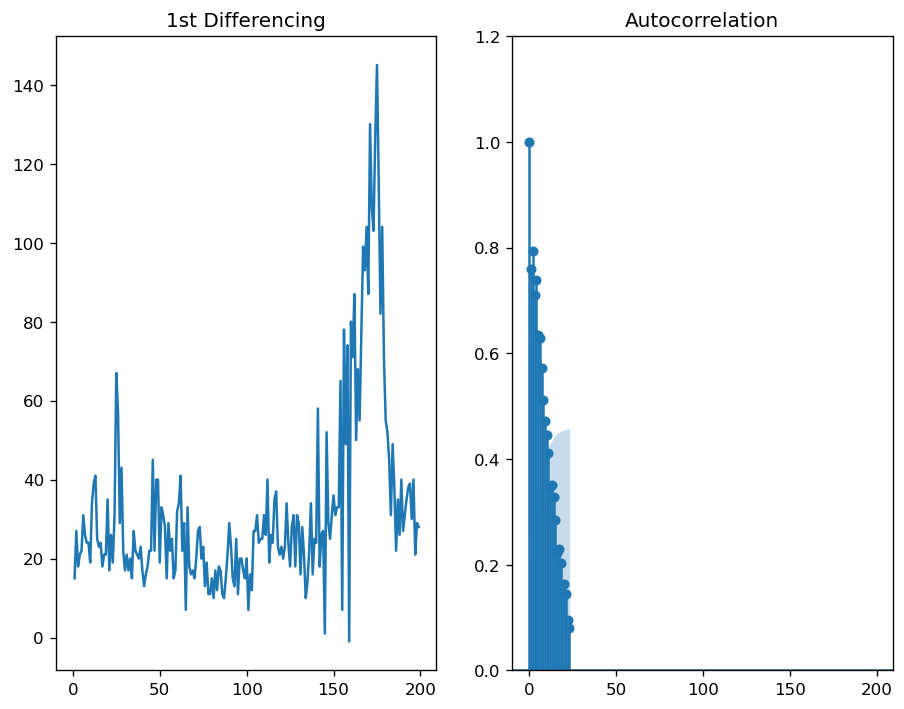

In [293]:
# PACF plot of 1st differenced series
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

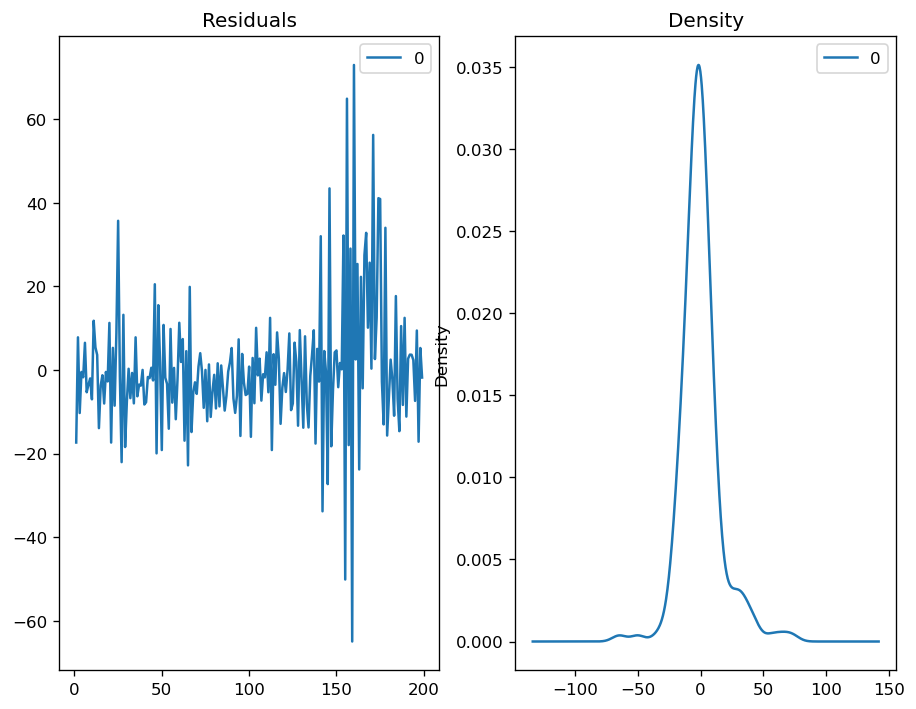

In [296]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

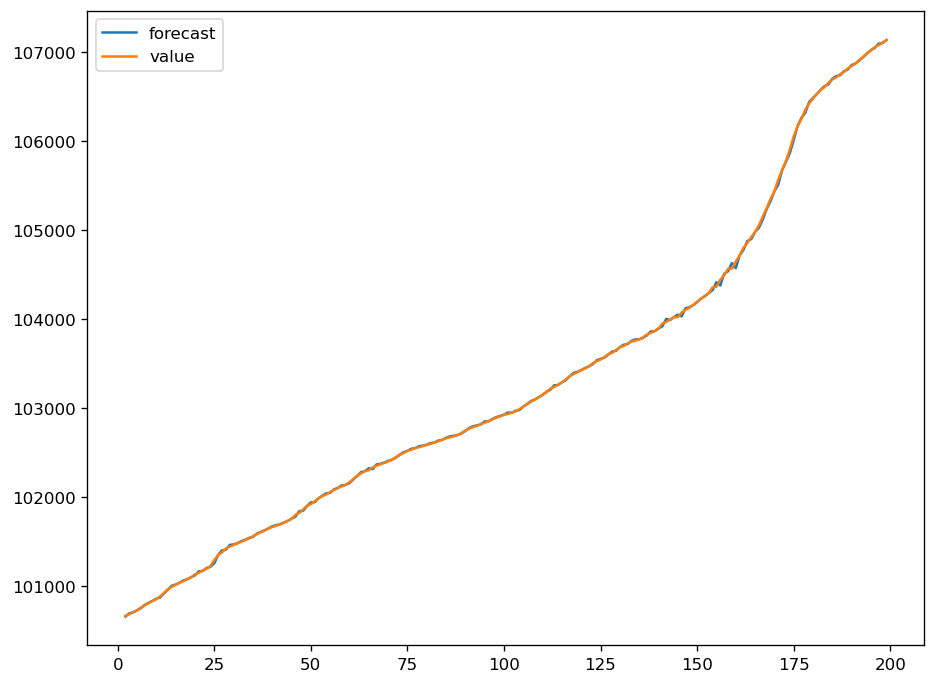

In [297]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [305]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:100]
test = df.value[100:]

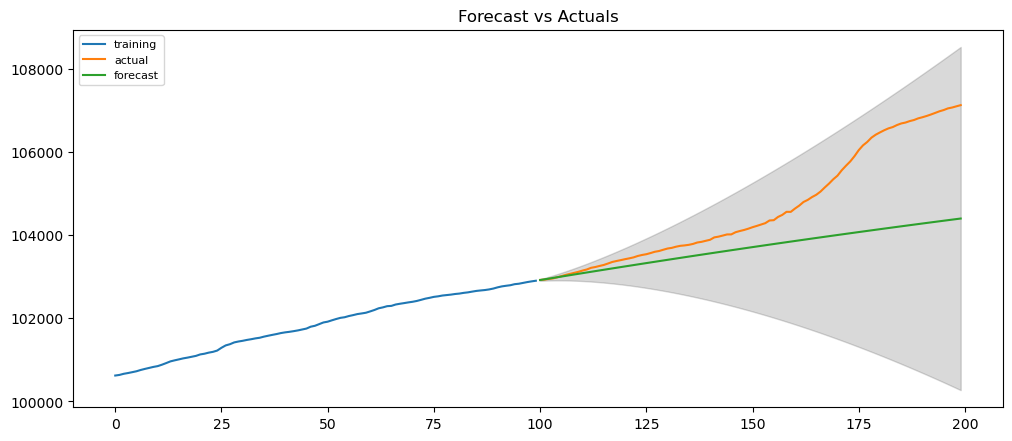

In [325]:
# Build Model
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals of China')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [327]:
df = confirmed_df[confirmed_df['Country/Region'] == 'Canada'].sum()
df = df[-200:]
keys = df.keys().tolist()
value = []
for cha in keys:
    value.append(df[cha])
    
dic = {'Month': keys, 'value': value}
df = pd.DataFrame(dic)

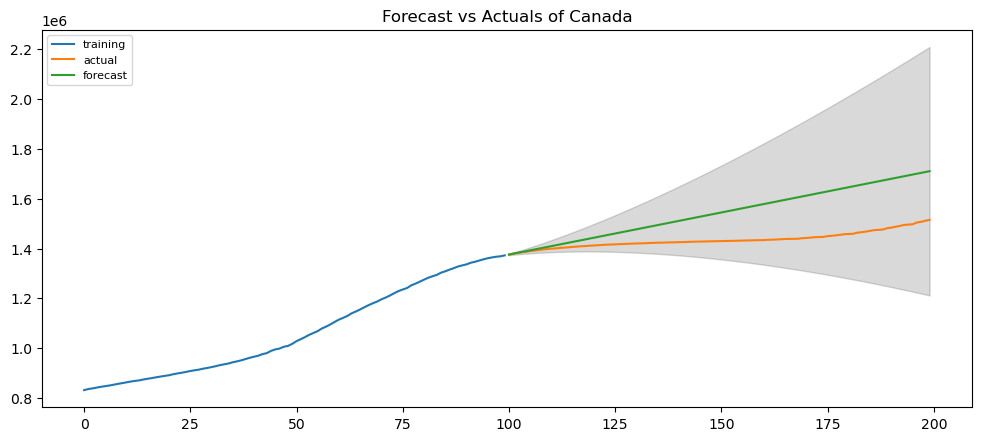

In [329]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:100]
test = df.value[100:]

# Build Model
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals of Canada')
plt.legend(loc='upper left', fontsize=8)
plt.show()